<a href="https://colab.research.google.com/github/tocom242242/notebooks/blob/master/pytorch/korina_split_img.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
!pip install kornia

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


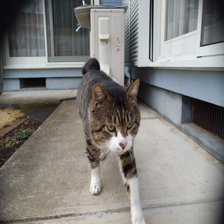

In [17]:

import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import kornia
import cv2
import numpy as np
from PIL import Image

with Image.open("<path/to/your/image") as img:
    img = img.resize((224,224))
    display(img)
    original = np.expand_dims(np.asarray(img, np.float32).transpose([2, 0, 1]), axis=0) / 255.0

torch.Size([1, 3, 224, 224])
torch.Size([1, 81, 3, 50, 50])
torch.Size([81, 3, 50, 50])


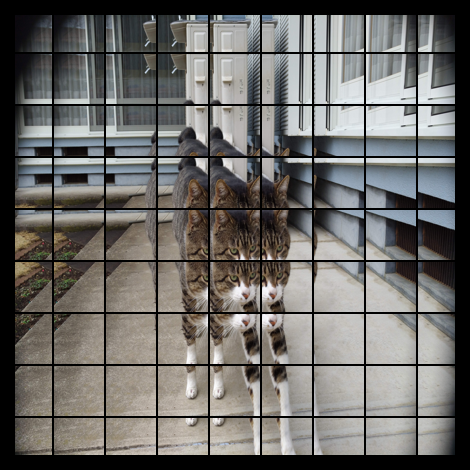

In [25]:
patch_size = 50
stride = 25
x = torch.as_tensor(original)
print(x.shape)
padding = kornia.contrib.compute_padding(
            x.shape[-2:], (patch_size, patch_size)
        )
patches = kornia.contrib.extract_tensor_patches(
        x, (patch_size, patch_size), stride=stride, padding=padding
    )
print(patches.shape)
patches = patches.contiguous().view(-1, 3, *patches.shape[-2:])
print(patches.shape)

img = torchvision.utils.make_grid(patches, nrow=9)
img = transforms.functional.to_pil_image(img)
display(img)